In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import sys
sys.path.append('../py_files/')
sys.path.append('/home/pranavsatheesh/arepo_package/')
#import weights
import control_sample as control
import arepo_package as arepo
from tqdm import tqdm
import os

import host_galaxy_enhancement_plots as hostplot

tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

import scienceplots
plt.style.use('science')

In [2]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/'

TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])
TNG_50_control = control.control_samples_TNG(TNG_50_pop)
TNG_color = '#d95f02'

processing each merger redshifts for controls:  11%|█         | 9/83 [00:00<00:00, 87.37it/s]

processing each merger redshifts for controls: 100%|██████████| 83/83 [00:01<00:00, 42.16it/s]
/home/pranavsatheesh/host_galaxies/notebooks/../py_files/control_sample.py:378: RuntimeWarning: invalid value encountered in divide
  self.sBHAR_control_pop = self.Mdot_control_pop/self.MBH_control_pop


Number of available mergers in this population is 504
Number of cases where a close enough match is not found within the acceptable tolerance: 14


In [3]:
brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']
brahma_sim_colors = {brahma_simName_array[0]: '#bdc9e1', brahma_simName_array[1]: '#67a9cf', brahma_simName_array[2]: '#1c9099', brahma_simName_array[3]: '#016c59'}
brahma_sim_obj = {}
brahma_sim_zbins = {}
#brahma_sim_zbin_width = {}
for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    brahma_sim_obj[sim] = brahma_control
    #brahma_sim_zbin_width,brahma_sim_zbins[sim] =hostplot.find_best_z_width(brahma_control.z_merging_pop,z_min=0,z_max=10,z_width_initial=0.2)
    brahma_sim_zbins[sim] = hostplot.find_adaptive_z_bins(brahma_control.z_merging_pop,z_min=0,z_max=12,zbin_width=0.3,min_N_values=5)
    print(sim,brahma_sim_zbins[sim])

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 26.40it/s]
/home/pranavsatheesh/host_galaxies/notebooks/../py_files/control_sample.py:953: RuntimeWarning: invalid value encountered in divide
  self.sBHAR_control_pop = self.Mdot_control_pop/self.MBH_control_pop


Number of cases where a close enough match is not found within the acceptable tolerance: 110
number of processable mergers with valid controls:
664
[32, 47, 53, 95, 97, 138, 97, 48, 33, 17, 7]
SM5_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 8.1]


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 31.47it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 104
number of processable mergers with valid controls:
539
[24, 33, 51, 72, 69, 96, 88, 52, 31, 16, 5]
SM5_LW10_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1]


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 45.87it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 80
number of processable mergers with valid controls:
405
[28, 22, 29, 41, 44, 91, 59, 35, 26, 19, 6, 5]
SM5_LW10_LOWSPIN_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1 9.1]


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 116.69it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 49
number of processable mergers with valid controls:
127
[9, 7, 5, 15, 14, 25, 12, 17, 11, 5, 5]
SM5_LW10_LOWSPIN_RICH_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 8.1]


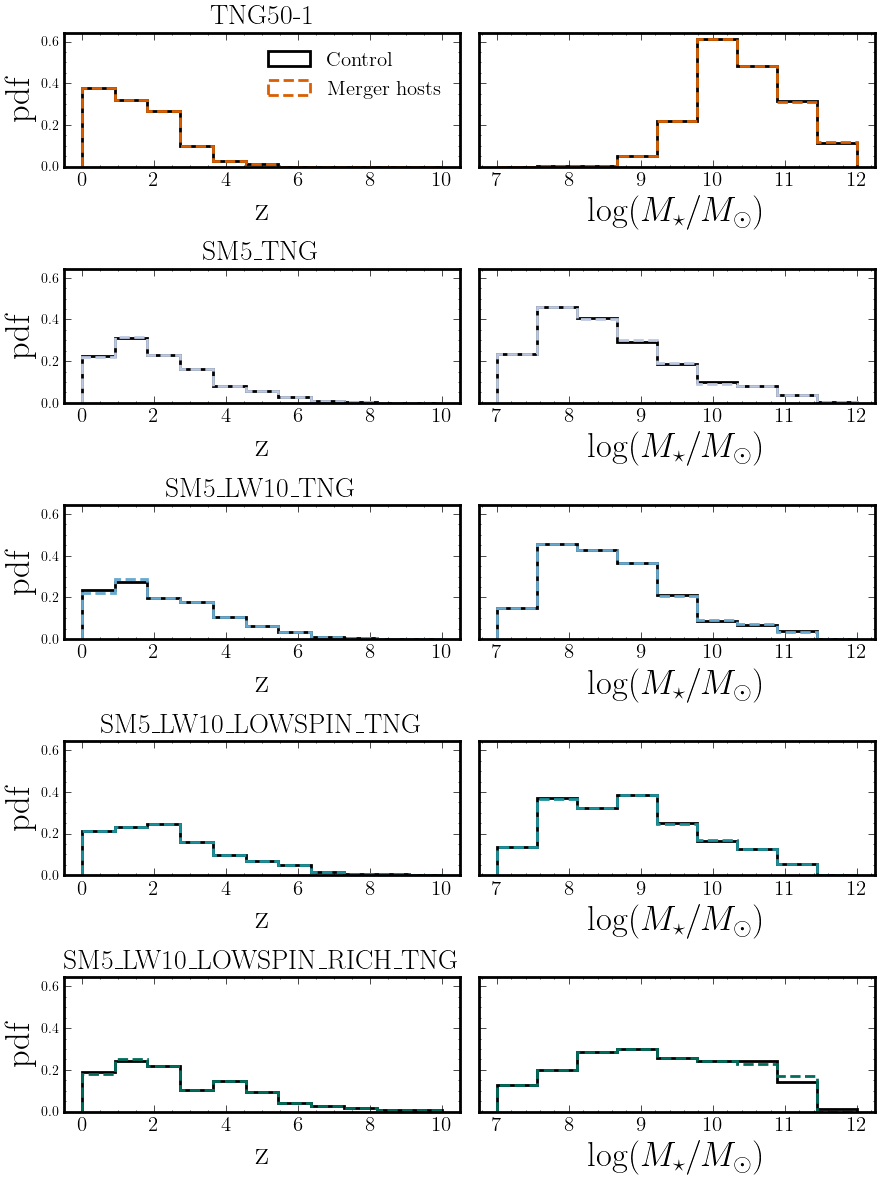

In [10]:
fig, axes = plt.subplots(5,2,figsize=(9,12),sharey=True)
hostplot.set_plot_style(linewidth=2,spinewidth=2, titlesize=20,labelsize=25,xticksize=15,yticksize=10,legendsize=15)
flattened_axes = axes.flatten()

axes_plt = hostplot.match_z_Mstar_plot([axes[0][0],axes[0][1]],TNG_50_control,sim_color=TNG_color,Mstar_binsize = 0.5,Mstar_min = 7,Mstar_max = 12,z_binsize = 0.8,z_min = 0,z_max = 10)
axes_plt[0].set_title("TNG50-1")
axes_plt[0].set_xlabel("z")
axes_plt[0].set_ylabel("pdf")
axes_plt[1].set_xlabel("$\log(M_{\star}/M_{\odot})$")

for i,sim in enumerate(brahma_simName_array):
    ax_plt = [axes[i+1][0],axes[i+1][1]]
    axes_plt = hostplot.match_z_Mstar_plot(ax_plt,brahma_sim_obj[sim],sim_color=brahma_sim_colors[sim],Mstar_binsize = 0.5,Mstar_min = 7,Mstar_max = 12,z_binsize = 0.8,z_min = 0,z_max = 10)
    axes_plt[0].set_title(sim)
    axes_plt[0].set_xlabel("z")
    axes_plt[0].set_ylabel("pdf")
    axes_plt[1].set_xlabel("$\log(M_{\star}/M_{\odot})$")

axes[0,0].legend()
fig.tight_layout()
fig.savefig('../figures/matching_z_Mstar_distributions_controls_vs_mergers_sims.pdf')